# Cleaning & Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 500)
df = pd.read_excel('../data/ml_project1_data.xlsx')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [40]:
# checking for class imbalance
df.Response.value_counts()

0    1906
1     334
Name: Response, dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
ID                     2240 non-null int64
Year_Birth             2240 non-null int64
Education              2240 non-null object
Marital_Status         2240 non-null object
Income                 2216 non-null float64
Kidhome                2240 non-null int64
Teenhome               2240 non-null int64
Dt_Customer            2240 non-null object
Recency                2240 non-null int64
MntWines               2240 non-null int64
MntFruits              2240 non-null int64
MntMeatProducts        2240 non-null int64
MntFishProducts        2240 non-null int64
MntSweetProducts       2240 non-null int64
MntGoldProds           2240 non-null int64
NumDealsPurchases      2240 non-null int64
NumWebPurchases        2240 non-null int64
NumCatalogPurchases    2240 non-null int64
NumStorePurchases      2240 non-null int64
NumWebVisitsMonth      2240 non-null int64
AcceptedCmp3           2240 

In [42]:
# checking for Nans
df[df.isna().any(axis=1) == True]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


In [43]:
df.Income.describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [3]:
# filling income nans with median value
df.Income.fillna(df.Income.median(), inplace=True)

In [45]:
df.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [4]:
# changing varaiables to something i can understand more
basic=df.Education == 'Basic'
df.loc[basic,'Education'] = 'HighSchool'

In [5]:
bachelors=df.Education == 'Graduation'
df.loc[bachelors,'Education'] = 'Bachelors'

In [48]:
df.Education.value_counts()

Bachelors     1127
PhD            486
Master         370
2n Cycle       203
HighSchool      54
Name: Education, dtype: int64

In [49]:
df.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [50]:
df.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [6]:
# clearly the person who made this data set had a bit of fun!
alone = df.Marital_Status == 'Alone'
yolo = df.Marital_Status == 'YOLO'
absurd = df.Marital_Status == 'Absurd'
df.loc[alone, 'Marital_Status'] = 'Single'
df.loc[yolo, 'Marital_Status'] = 'Single'
df.loc[absurd, 'Marital_Status'] = 'Single'

In [7]:
# changing dates to datetime objects
df.Dt_Customer = pd.to_datetime(df.Dt_Customer, format='%Y/%m/%d')

In [8]:
df.Dt_Customer = [x.date() for x in df.Dt_Customer]

In [9]:
# adding weekdays as a variable
df['Dt_Customer_Weekday'] = ''
df['Dt_Customer_Weekday'] = [x.weekday() for x in df.Dt_Customer]
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_Customer_Weekday
0,5524,1957,Bachelors,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1
1,2174,1954,Bachelors,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,5
2,4141,1965,Bachelors,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2
3,6182,1984,Bachelors,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,6


In [55]:
df.Dt_Customer[0].timetuple().tm_yday

248

In [62]:
# adding season as a feature. very inefficient method, but i wanted to be exact here
from tqdm import tqdm_notebook
df['Season'] = ''
for i in tqdm_notebook(range(len(df))):
    if df.Dt_Customer[i].timetuple().tm_yday in range(79,172):
        df.Season[i] = 'Spring'
    elif df.Dt_Customer[i].timetuple().tm_yday in range(172,266):
        df.Season[i] = 'Summer'
    elif df.Dt_Customer[i].timetuple().tm_yday in range(266,355):
        df.Season[i] = 'Autumn'
    else:
        df.Season[i] = 'Winter'

In [10]:
# engineering some more features. dictionary indicated the amount spent on each category was over 2 years while income was annual, hence multiplying by 2
df['MntWine_PerIncome'] = df.MntWines/(2*df.Income)
df['MntFruit_PerIncome'] = df.MntFruits/(2*df.Income)
df['MntMeat_PerIncome'] = df.MntMeatProducts/(2*df.Income)
df['MntFish_PerIncome'] = df.MntFishProducts/(2*df.Income)
df['MntSweet_PerIncome'] = df.MntSweetProducts/(2*df.Income)
df['MntGold_PerIncome'] = df.MntGoldProds/(2*df.Income)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_Customer_Weekday,MntWine_PerIncome,MntFruit_PerIncome,MntMeat_PerIncome,MntFish_PerIncome,MntSweet_PerIncome,MntGold_PerIncome
0,5524,1957,Bachelors,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1,0.005461,0.000757,0.004696,0.001479,0.000757,0.000757
1,2174,1954,Bachelors,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,5,0.000119,0.000011,0.000065,0.000022,0.000011,0.000065
2,4141,1965,Bachelors,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2,0.002974,0.000342,0.000887,0.000775,0.000147,0.000293
3,6182,1984,Bachelors,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,0,0.000206,0.000075,0.000375,0.000188,0.000056,0.000094
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,6,0.001484,0.000369,0.001012,0.000395,0.000232,0.000129


In [63]:
df.Season.value_counts()

Spring    594
Winter    563
Autumn    560
Summer    523
Name: Season, dtype: int64

In [11]:
df = df.rename(columns={'Season':'Dt_Customer_Season'})

In [ ]:
df.shape

In [65]:
# dropping useless columns
df = df.drop('ID', axis=1)
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Dt_Customer_Weekday', 'Dt_Customer_Season', 'MntWine_PerIncome',
       'MntFruit_PerIncome', 'MntMeat_PerIncome', 'MntFish_PerIncome',
       'MntSweet_PerIncome', 'MntGold_PerIncome'],
      dtype='object')

In [12]:
df.Z_CostContact.unique()
df.Z_Revenue.unique()
df = df.drop(['Z_CostContact', 'Z_Revenue'], axis=1)

In [67]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Dt_Customer_Weekday,Dt_Customer_Season,MntWine_PerIncome,MntFruit_PerIncome,MntMeat_PerIncome,MntFish_PerIncome,MntSweet_PerIncome,MntGold_PerIncome
0,1957,Bachelors,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1,Summer,0.005461,0.000757,0.004696,0.001479,0.000757,0.000757
1,1954,Bachelors,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,5,Winter,0.000119,0.000011,0.000065,0.000022,0.000011,0.000065
2,1965,Bachelors,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,2,Summer,0.002974,0.000342,0.000887,0.000775,0.000147,0.000293
3,1984,Bachelors,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,0,Winter,0.000206,0.000075,0.000375,0.000188,0.000056,0.000094
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,6,Winter,0.001484,0.000369,0.001012,0.000395,0.000232,0.000129


In [20]:
# creating dummy variables from categorical features
marital_status_dummies = pd.get_dummies(df.Marital_Status, prefix='marital_status')
ed_dummies = pd.get_dummies(df.Education, prefix='Education')
# weekday_dummies = pd.get_dummies(df.Dt_Customer_Weekday, prefix='Dt_Custom_Weekday')
# season_dummies = pd.get_dummies(df.Dt_Customer_Season, prefix='Dt_Customer_Season')
# df_dummies = pd.concat([df, marital_status_dummies,ed_dummies,weekday_dummies,season_dummies], axis=1)
df_dummies = pd.concat([df, marital_status_dummies,ed_dummies], axis=1)
df_dummies.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Dt_Customer_Weekday,MntWine_PerIncome,MntFruit_PerIncome,MntMeat_PerIncome,MntFish_PerIncome,MntSweet_PerIncome,MntGold_PerIncome,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Together,marital_status_Widow,Education_2n Cycle,Education_Bachelors,Education_HighSchool,Education_Master,Education_PhD
0,5524,1957,Bachelors,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1,0.005461,0.000757,0.004696,0.001479,0.000757,0.000757,0,0,1,0,0,0,1,0,0,0
1,2174,1954,Bachelors,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,5,0.000119,0.000011,0.000065,0.000022,0.000011,0.000065,0,0,1,0,0,0,1,0,0,0
2,4141,1965,Bachelors,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,2,0.002974,0.000342,0.000887,0.000775,0.000147,0.000293,0,0,0,1,0,0,1,0,0,0
3,6182,1984,Bachelors,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,0,0.000206,0.000075,0.000375,0.000188,0.000056,0.000094,0,0,0,1,0,0,1,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,6,0.001484,0.000369,0.001012,0.000395,0.000232,0.000129,0,1,0,0,0,0,0,0,0,1


In [21]:
# dropping old feature columns
# new_df = df_dummies.drop(['Education', 'Marital_Status', 'Dt_Customer', 'Dt_Customer_Weekday', 'Dt_Customer_Season'], axis=1)
new_df = df_dummies.drop(['Education', 'Marital_Status', 'Dt_Customer'], axis=1)

# EDA

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

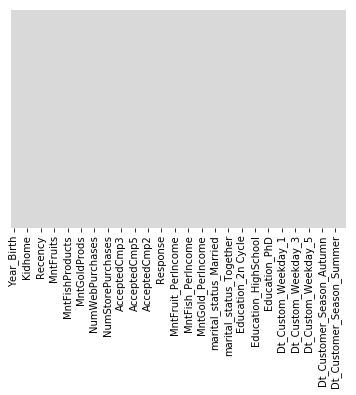

In [74]:
# double checking for null values
sns.heatmap(new_df.isnull(),yticklabels=False,cbar=False,cmap='tab20c_r')

In [75]:
# quick check for distribution and outliers
new_df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,MntWine_PerIncome,MntFruit_PerIncome,MntMeat_PerIncome,MntFish_PerIncome,MntSweet_PerIncome,MntGold_PerIncome,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Together,marital_status_Widow,Education_2n Cycle,Education_Bachelors,Education_HighSchool,Education_Master,Education_PhD,Dt_Custom_Weekday_0,Dt_Custom_Weekday_1,Dt_Custom_Weekday_2,Dt_Custom_Weekday_3,Dt_Custom_Weekday_4,Dt_Custom_Weekday_5,Dt_Custom_Weekday_6,Dt_Customer_Season_Autumn,Dt_Customer_Season_Spring,Dt_Customer_Season_Summer,Dt_Customer_Season_Winter
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107,0.002364,0.000216,0.001408,0.000307,0.000220,0.000438,0.103571,0.385714,0.217411,0.258929,0.034375,0.090625,0.503125,0.024107,0.165179,0.216964,0.152232,0.126786,0.151339,0.138393,0.148661,0.145089,0.137500,0.250000,0.265179,0.233482,0.251339
std,11.984069,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274,0.002334,0.000294,0.007551,0.000397,0.000301,0.001054,0.304772,0.486872,0.412576,0.438144,0.182231,0.287139,0.500102,0.153416,0.371425,0.412270,0.359326,0.332807,0.358459,0.345389,0.355833,0.352269,0.344451,0.433109,0.441527,0.423141,0.433880
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000350,0.000021,0.000237,0.000036,0.000019,0.000104,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001645,0.000099,0.000691,0.000147,0.000099,0.000258,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [81]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 50 columns):
Year_Birth                   2240 non-null int64
Income                       2240 non-null float64
Kidhome                      2240 non-null int64
Teenhome                     2240 non-null int64
Recency                      2240 non-null int64
MntWines                     2240 non-null int64
MntFruits                    2240 non-null int64
MntMeatProducts              2240 non-null int64
MntFishProducts              2240 non-null int64
MntSweetProducts             2240 non-null int64
MntGoldProds                 2240 non-null int64
NumDealsPurchases            2240 non-null int64
NumWebPurchases              2240 non-null int64
NumCatalogPurchases          2240 non-null int64
NumStorePurchases            2240 non-null int64
NumWebVisitsMonth            2240 non-null int64
AcceptedCmp3                 2240 non-null int64
AcceptedCmp4                 2240 non-null int64
AcceptedC

In [88]:
graph_col = new_df.columns[:29]

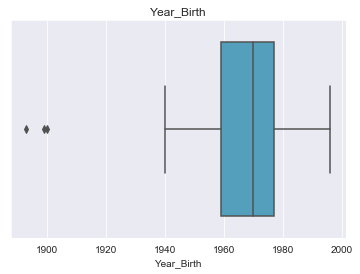

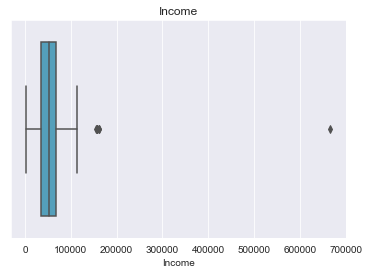

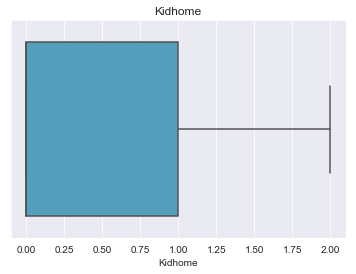

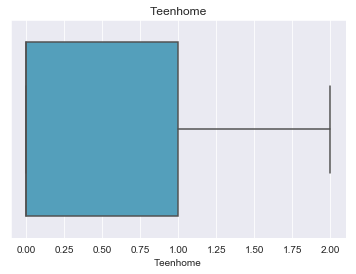

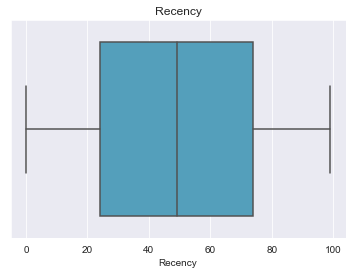

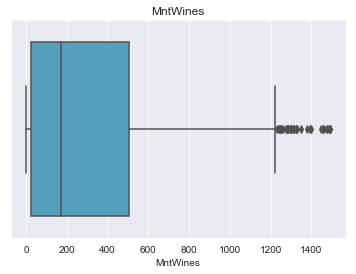

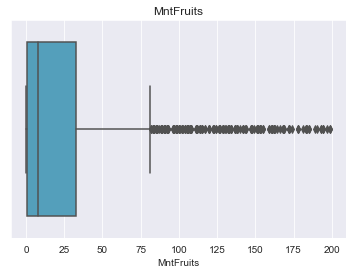

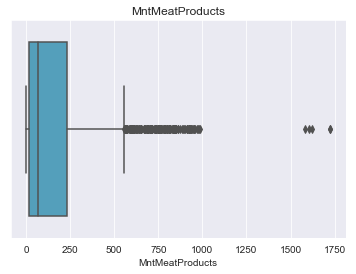

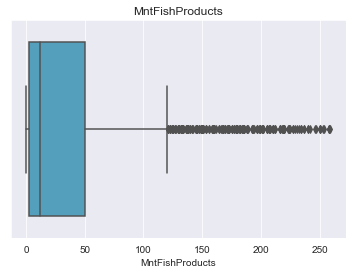

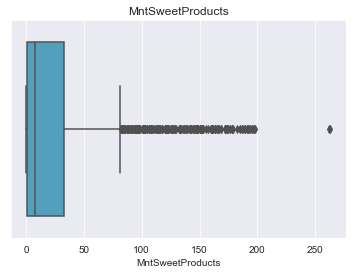

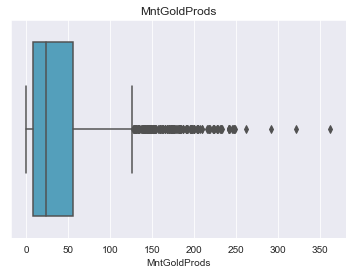

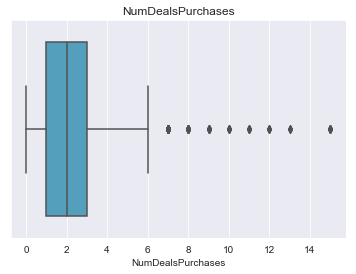

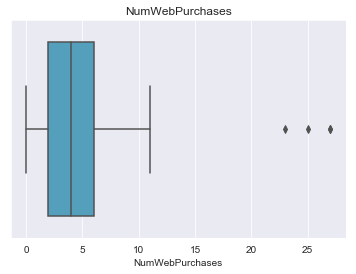

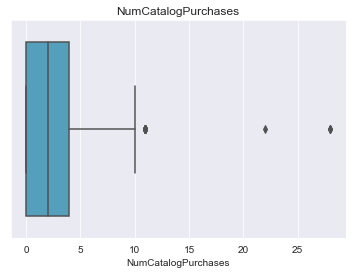

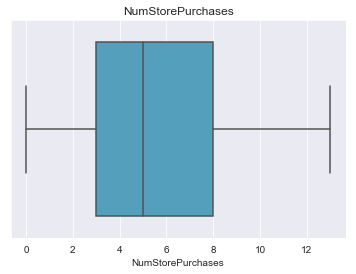

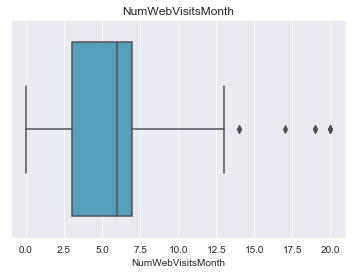

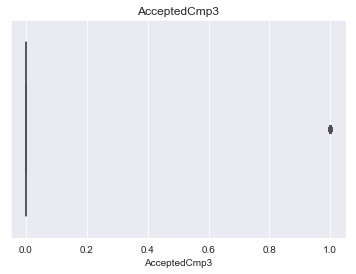

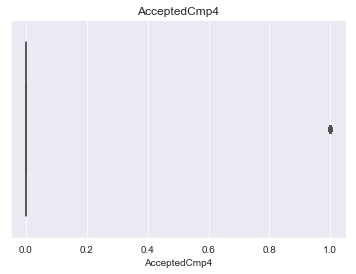

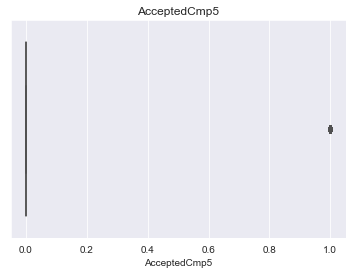

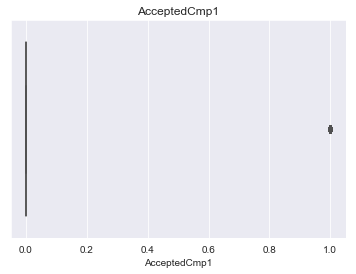

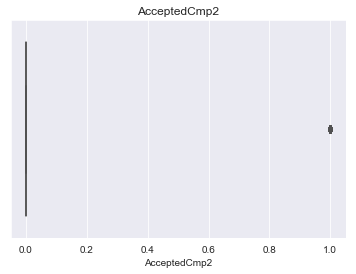

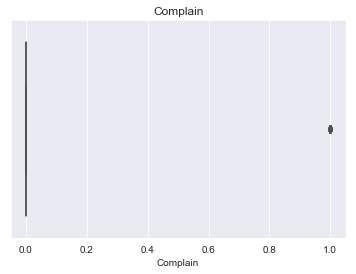

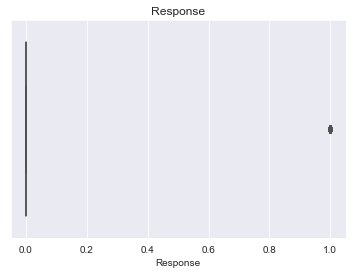

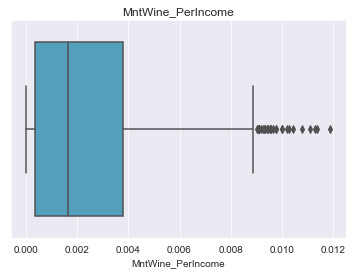

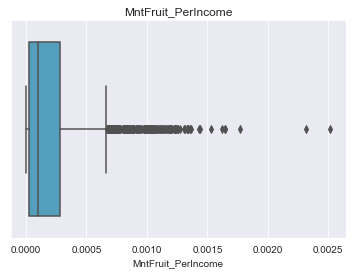

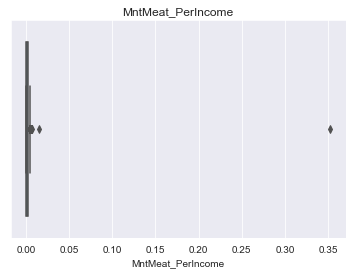

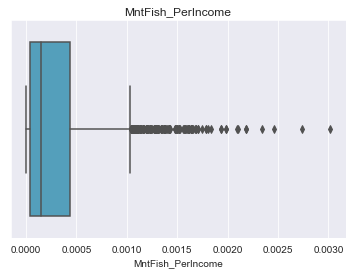

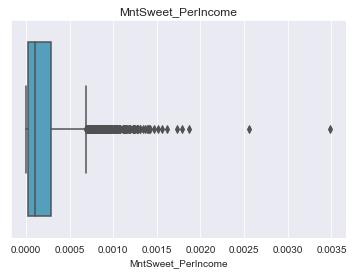

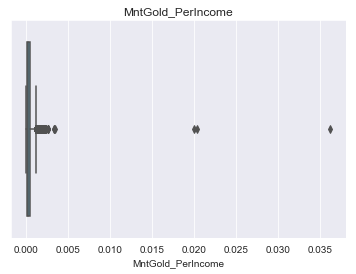

In [96]:
# more detailed look at distributions, engineered income proportions vary the most while amount spent on products also vary a lot
sns.set_style('darkgrid')
for column in graph_col:
    sns.boxplot(x = column, palette= 'GnBu_d', data = df).set_title(column)
    plt.show()

In [92]:
# checking min and max of income amounts
new_df.Income.sort_values()

1245      1730.0
21        2447.0
1524      3502.0
1846      4023.0
1975      4428.0
981       4861.0
2214      5305.0
9         5648.0
1328      6560.0
774       6835.0
1806      7144.0
439       7500.0
46        7500.0
1299      7500.0
238       7500.0
2029      7500.0
1246      7500.0
724       7500.0
862       7500.0
44        7500.0
1152      7500.0
11        7500.0
2222      7500.0
1042      8028.0
2195      8820.0
1220      8940.0
1536      9255.0
136       9548.0
1704      9722.0
385      10245.0
          ...   
426      92910.0
966      92955.0
424      93027.0
826      93404.0
1458     93790.0
943      94384.0
1301     94384.0
1993     94472.0
1982     94642.0
1473     94871.0
1001     95169.0
914      95529.0
1995     96547.0
1958     96843.0
2012     96876.0
650      98777.0
1113     98777.0
124     101970.0
203     102160.0
252     102692.0
646     105471.0
1898    113734.0
655     153924.0
2132    156924.0
1653    157146.0
164     157243.0
1300    157733.0
687     160803

In [22]:
# filtering data to remove income outliers
new_df = new_df[(new_df.Income<125000) & (new_df.Income>10000)]

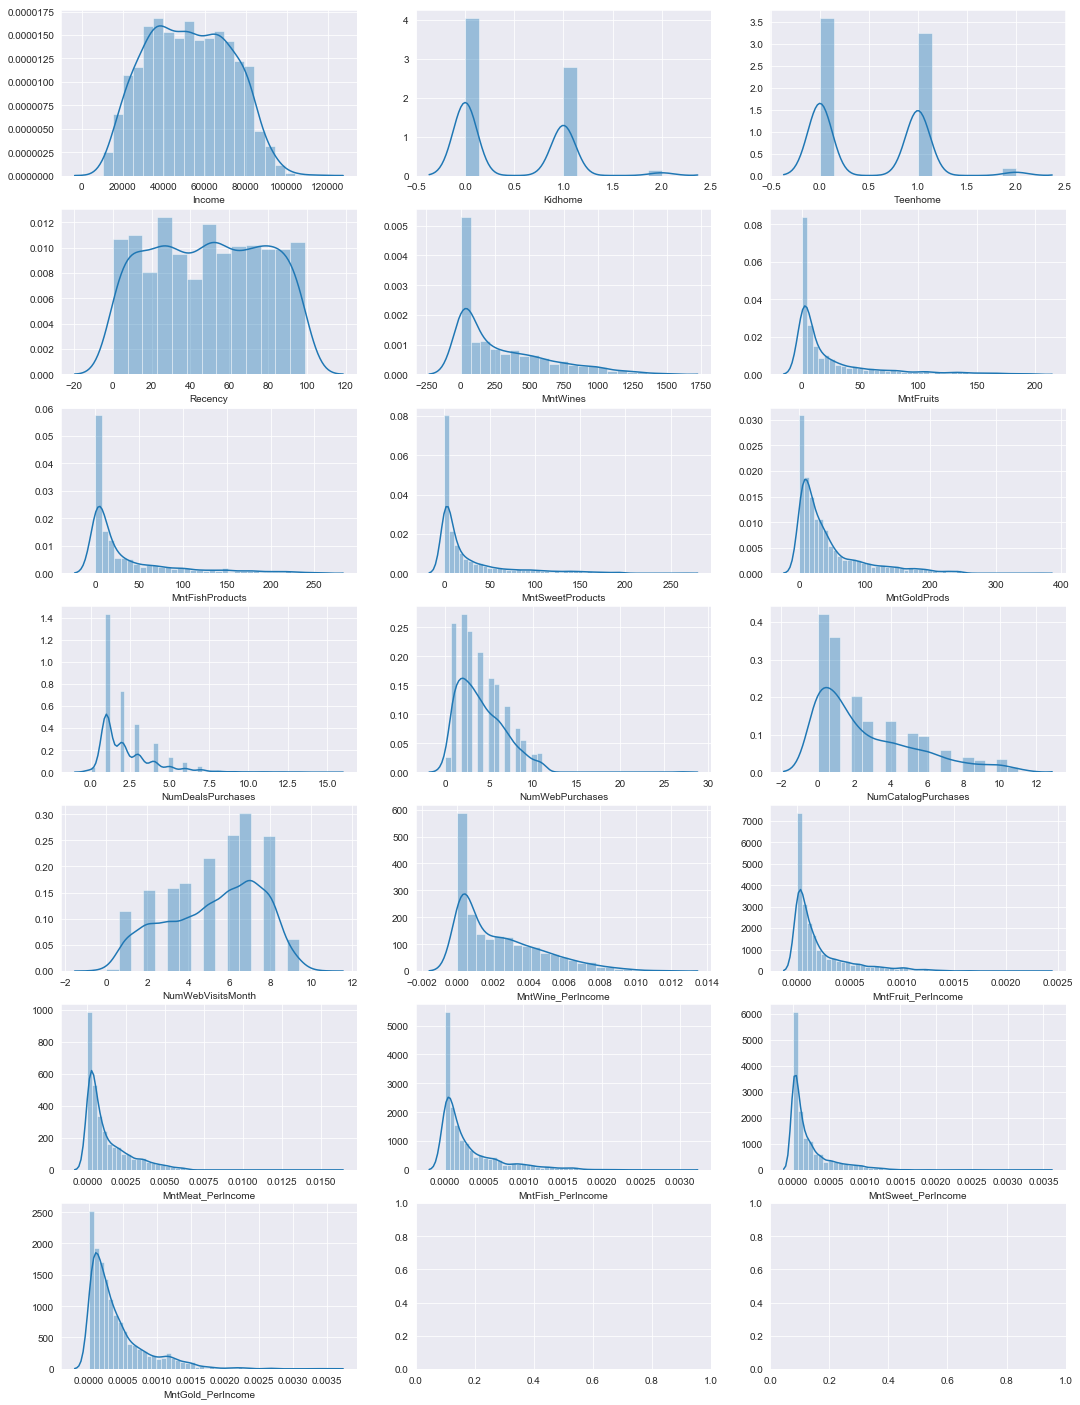

In [118]:
# plotting feature distributions
fig, ([ax1,ax2,ax3],[ax4,ax5,ax6],[ax7,ax8,ax9],[ax10,ax11,ax12],[ax13,ax14,ax15],[ax16,ax17,ax18]
     ,[ax19,ax20,ax21]) = plt.subplots(7,3, figsize=(18,25))
sns.distplot(new_df.Income, ax=ax1)
sns.distplot(new_df.Kidhome, ax=ax2)
sns.distplot(new_df.Teenhome, ax=ax3)
sns.distplot(new_df.Recency, ax=ax4)
sns.distplot(new_df.MntWines, ax=ax5)
sns.distplot(new_df.MntFruits, ax=ax6)
sns.distplot(new_df.MntFishProducts, ax=ax7)
sns.distplot(new_df.MntSweetProducts, ax=ax8)
sns.distplot(new_df.MntGoldProds, ax=ax9)
sns.distplot(new_df.NumDealsPurchases, ax=ax10)
sns.distplot(new_df.NumWebPurchases, ax=ax11)
sns.distplot(new_df.NumCatalogPurchases, ax=ax12)
sns.distplot(new_df.NumWebVisitsMonth, ax=ax13)
sns.distplot(new_df.MntWine_PerIncome, ax=ax14)
sns.distplot(new_df.MntFruit_PerIncome, ax=ax15)
sns.distplot(new_df.MntMeat_PerIncome, ax=ax16)
sns.distplot(new_df.MntFish_PerIncome, ax=ax17)
sns.distplot(new_df.MntSweet_PerIncome, ax=ax18)
sns.distplot(new_df.MntGold_PerIncome, ax=ax19)

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
len(new_df[(new_df.Response == 1) & (new_df.AcceptedCmp3 == 1)]), len(new_df[(new_df.Response == 0) & (new_df.AcceptedCmp3 == 1)]), len(new_df[(new_df.Response == 1) & (new_df.AcceptedCmp3 == 0)]), len(new_df[(new_df.Response == 0) & (new_df.AcceptedCmp3 == 0)])

(76, 85, 255, 1787)

In [45]:
new_df.Response.value_counts()[1]

331

In [4]:
# looking at most highly correlated features with target
new_df = pd.read_csv('../data/df_no_transform.csv').drop('Unnamed: 0', axis=1)
np.abs(new_df.corr()['Response']).sort_values(ascending=False)

Response                     1.000000
AcceptedCmp5                 0.327644
AcceptedCmp1                 0.294834
AcceptedCmp3                 0.252882
MntMeatProducts              0.251877
MntWines                     0.247467
NumCatalogPurchases          0.241731
MntMeat_PerIncome            0.240476
MntWine_PerIncome            0.219826
Recency                      0.197802
AcceptedCmp4                 0.177143
Income                       0.176647
AcceptedCmp2                 0.169816
Teenhome                     0.155409
NumWebPurchases              0.151593
MntGoldProds                 0.142272
MntFruits                    0.124178
MntGold_PerIncome            0.122896
MntSweetProducts             0.115574
marital_status_Single        0.115143
MntFishProducts              0.109894
MntFruit_PerIncome           0.100014
Education_PhD                0.089936
MntSweet_PerIncome           0.088609
marital_status_Married       0.082759
Kidhome                      0.081332
marital_stat

In [18]:
np.abs(new_df.corr()) > .75

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,MntWine_PerIncome,MntFruit_PerIncome,MntMeat_PerIncome,MntFish_PerIncome,MntSweet_PerIncome,MntGold_PerIncome,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Together,marital_status_Widow,Education_2n Cycle,Education_Bachelors,Education_HighSchool,Education_Master,Education_PhD,Dt_Custom_Weekday_0,Dt_Custom_Weekday_1,Dt_Custom_Weekday_2,Dt_Custom_Weekday_3,Dt_Custom_Weekday_4,Dt_Custom_Weekday_5,Dt_Custom_Weekday_6,Dt_Customer_Season_Autumn,Dt_Customer_Season_Spring,Dt_Customer_Season_Summer,Dt_Customer_Season_Winter
Year_Birth,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Income,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Kidhome,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Teenhome,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Recency,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
MntWines,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
MntFruits,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
MntMeatProducts,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
MntFishProducts,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
MntSweetProducts,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
new_df.columns

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'MntWine_PerIncome',
       'MntFruit_PerIncome', 'MntMeat_PerIncome', 'MntFish_PerIncome',
       'MntSweet_PerIncome', 'MntGold_PerIncome', 'marital_status_Divorced',
       'marital_status_Married', 'marital_status_Single',
       'marital_status_Together', 'marital_status_Widow', 'Education_2n Cycle',
       'Education_Bachelors', 'Education_HighSchool', 'Education_Master',
       'Education_PhD', 'Dt_Custom_Weekday_0', 'Dt_Custom_Weekday_1',
       'Dt_Custom_Weekday_2', 'Dt_Custom_Weekday_3', 'Dt_Custom_Weekday_4',
       'Dt_Custom_Weekday_5', 'Dt_Custom_Weekday_6',
       'Dt_C

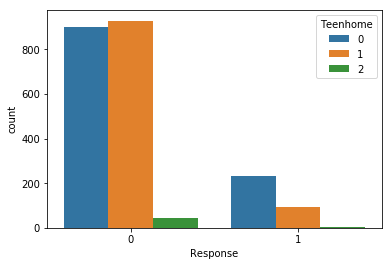

In [25]:
# using original df because its easier to chart when not dummies
# examining distribution of categorical variables by response
# proportionally many more people who had no teens in the home were converted
import seaborn as sns
sns.countplot(x=new_df.Response, hue=new_df.Teenhome)

In [12]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'MntWine_PerIncome', 'MntFruit_PerIncome', 'MntMeat_PerIncome',
       'MntFish_PerIncome', 'MntSweet_PerIncome', 'MntGold_PerIncome'],
      dtype='object')

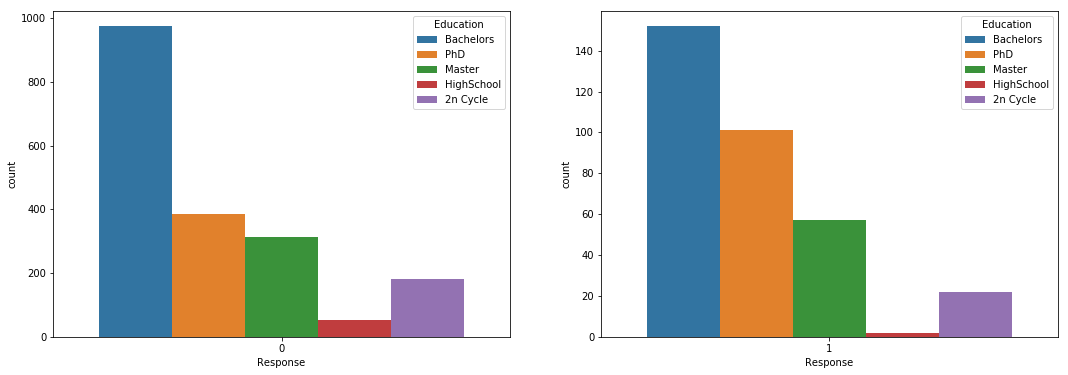

In [36]:
# proportionally many more PHDs were converted
f,(ax1,ax2) = plt.subplots(1,2, figsize=(18,6))
sns.countplot(df.Response[df.Response == 0], hue=df.Education, ax=ax1)
sns.countplot(df.Response[df.Response == 1], hue=df.Education, ax=ax2)

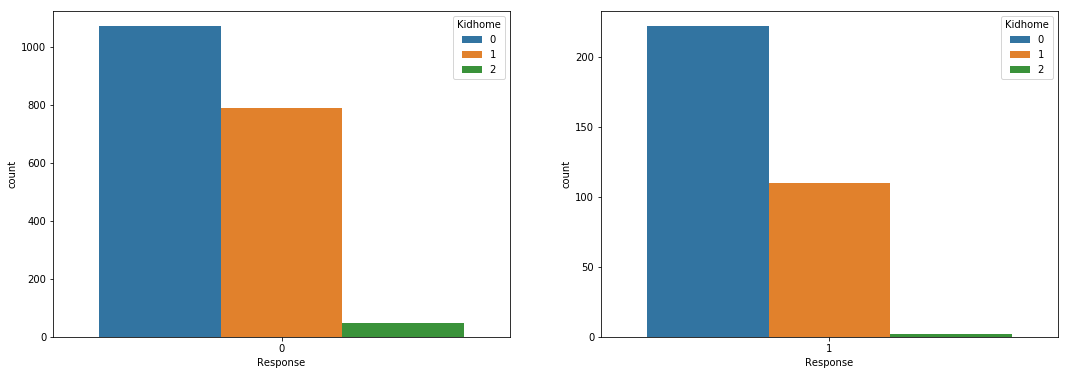

In [35]:
# similar to teens those who had no children in the home were converted prorportionally higher than the others, but was the most common for both positive and negative responses
f,(ax1,ax2) = plt.subplots(1,2, figsize=(18,6))
sns.countplot(df.Response[df.Response == 0], hue=df.Kidhome, ax=ax1)
sns.countplot(df.Response[df.Response == 1], hue=df.Kidhome, ax=ax2)

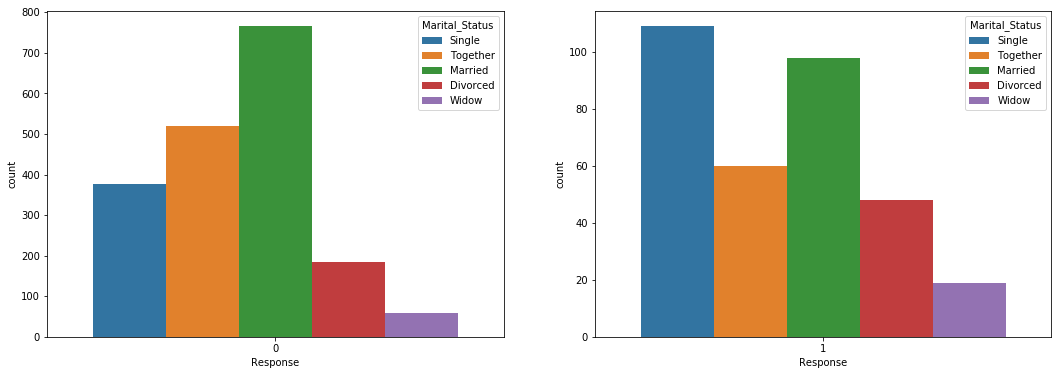

In [33]:
# proportionally single people were converted at a higher rate
f,(ax1,ax2) = plt.subplots(1,2, figsize=(18,6))
sns.countplot(df.Response[df.Response == 0], hue=df.Marital_Status, ax=ax1)
sns.countplot(df.Response[df.Response == 1],hue=df.Marital_Status, ax=ax2)

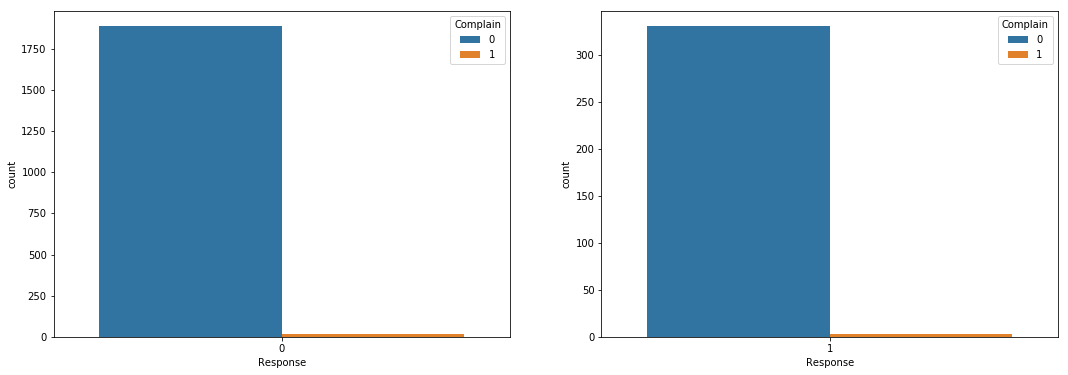

In [37]:
f,(ax1,ax2) = plt.subplots(1,2, figsize=(18,6))
sns.countplot(df.Response[df.Response == 0], hue=df.Complain, ax=ax1)
sns.countplot(df.Response[df.Response == 1],hue=df.Complain, ax=ax2)

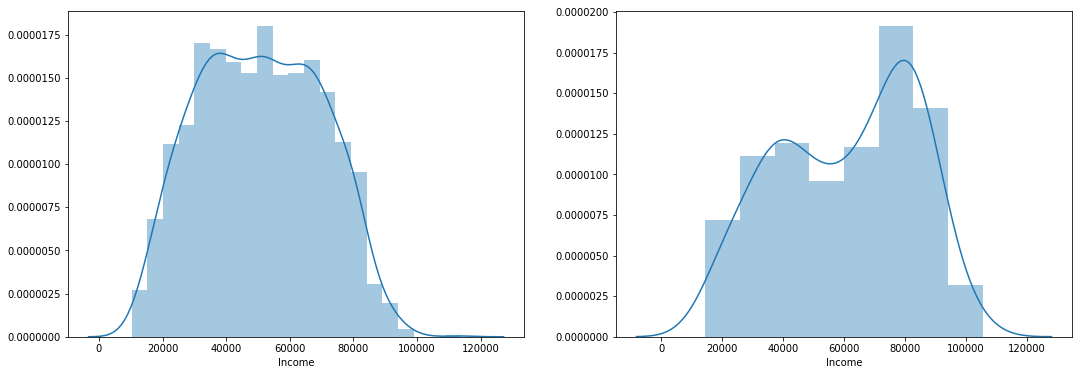

In [40]:
# when excluding outliers, those who were not converted had a more normally distributed income
f,(ax1,ax2) = plt.subplots(1,2, figsize=(18,6))
sns.distplot(new_df.Income[new_df.Response == 0], ax=ax1)
sns.distplot(new_df.Income[new_df.Response == 1], ax=ax2)

In [29]:
# 10k higher average income and 14k higher median average income for converted
pd.concat([new_df.Income[new_df.Response == 0].describe(), new_df.Income[new_df.Response == 1].describe()], axis=1)

,Income,Income
count,1872.000000,331.000000
mean,50730.209135,60654.022659
std,19196.684489,22731.067236
min,10245.000000,14515.000000
25%,35143.000000,40664.500000
50%,50884.000000,64140.000000
75%,65973.750000,80676.000000
max,113734.000000,105471.000000


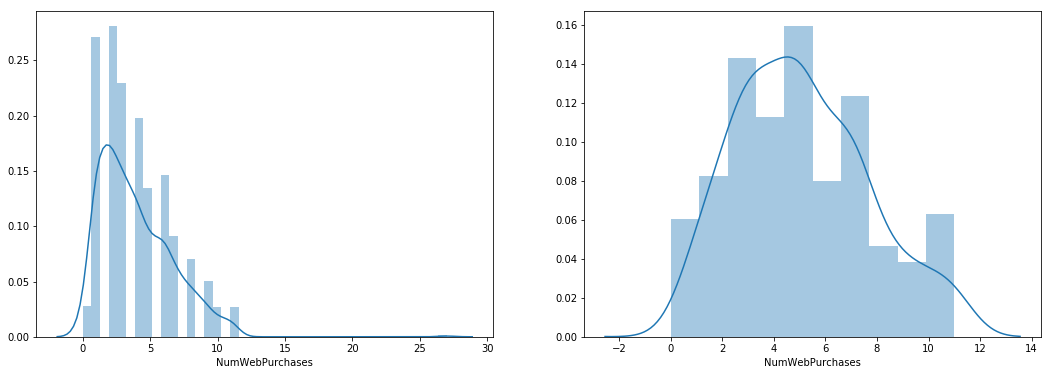

In [41]:
# seem to be a slightly higher number of web purchases for converted individuals
f,(ax1,ax2) = plt.subplots(1,2, figsize=(18,6))
sns.distplot(new_df.NumWebPurchases[new_df.Response == 0], ax=ax1)
sns.distplot(new_df.NumWebPurchases[new_df.Response == 1], ax=ax2)

In [31]:
# one more average web purchase and two more median
pd.concat([new_df.NumWebPurchases[new_df.Response == 0].describe(), new_df.NumWebPurchases[new_df.Response == 1].describe()], axis=1)

,NumWebPurchases,NumWebPurchases
count,1872.000000,331.000000
mean,3.938568,5.087613
std,2.697856,2.564595
min,0.000000,0.000000
25%,2.000000,3.000000
50%,3.000000,5.000000
75%,6.000000,7.000000
max,27.000000,11.000000


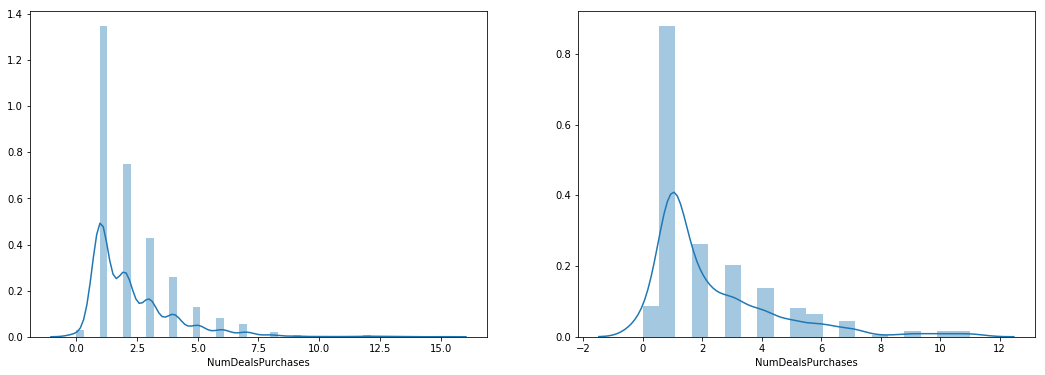

In [43]:
# similar distribution for number of deals
f,(ax1,ax2) = plt.subplots(1,2, figsize=(18,6))
sns.distplot(new_df.NumDealsPurchases[new_df.Response == 0], ax=ax1)
sns.distplot(new_df.NumDealsPurchases[new_df.Response == 1], ax=ax2)

In [33]:
# similar averages indicate not much of a correlation, which was shown above as having one of the lowest corr metrics
pd.concat([new_df.NumDealsPurchases[new_df.Response == 0].describe(), new_df.NumDealsPurchases[new_df.Response == 1].describe()], axis=1)

,NumDealsPurchases,NumDealsPurchases
count,1872.000000,331.000000
mean,2.294338,2.320242
std,1.763218,2.112054
min,0.000000,0.000000
25%,1.000000,1.000000
50%,2.000000,1.000000
75%,3.000000,3.000000
max,15.000000,11.000000


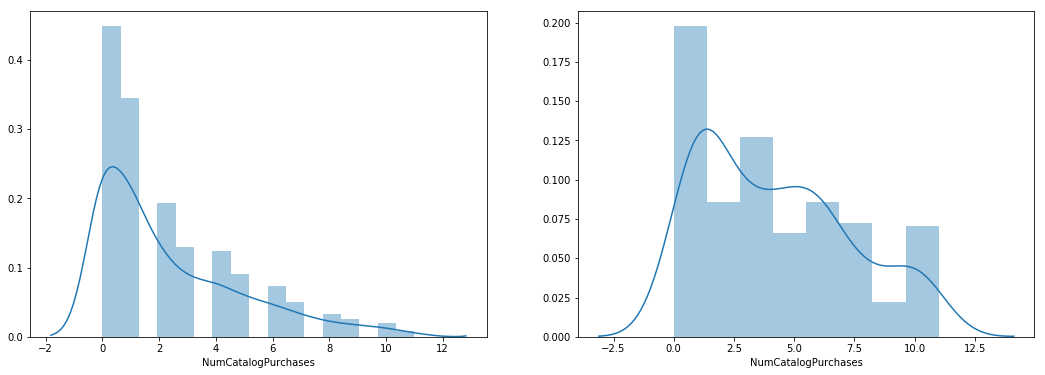

In [44]:
# not too much can be gleaned from here
f,(ax1,ax2) = plt.subplots(1,2, figsize=(18,6))
sns.distplot(new_df.NumCatalogPurchases[new_df.Response == 0], ax=ax1)
sns.distplot(new_df.NumCatalogPurchases[new_df.Response == 1], ax=ax2)

In [45]:
# about 2 more purchases for converted
pd.concat([new_df.NumCatalogPurchases[new_df.Response == 0].describe(), new_df.NumCatalogPurchases[new_df.Response == 1].describe()], axis=1)

,NumCatalogPurchases,NumCatalogPurchases
count,1872.000000,331.000000
mean,2.372329,4.232628
std,2.579520,3.131022
min,0.000000,0.000000
25%,0.000000,1.000000
50%,1.000000,4.000000
75%,4.000000,6.000000
max,11.000000,11.000000


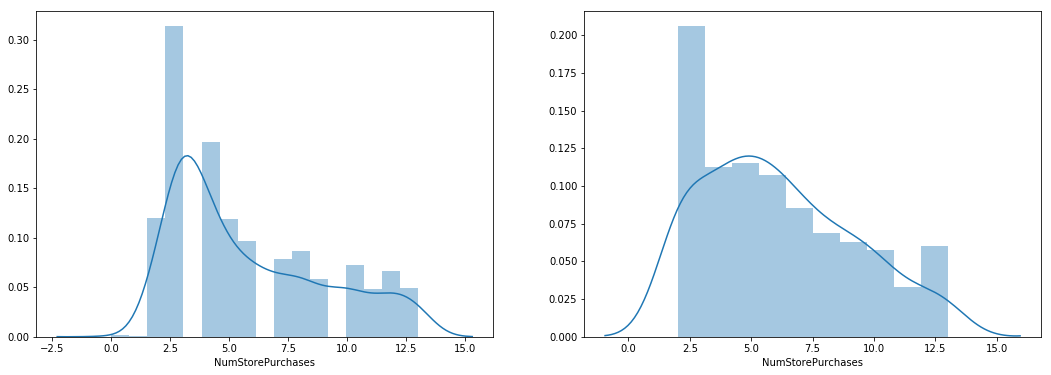

In [46]:
# slightly higher number of store purchases for converted customers
f,(ax1,ax2) = plt.subplots(1,2, figsize=(18,6))
sns.distplot(new_df.NumStorePurchases[new_df.Response == 0], ax=ax1)
sns.distplot(new_df.NumStorePurchases[new_df.Response == 1], ax=ax2)

In [36]:
# low difference in average reconfirming low correlation
pd.concat([new_df.NumStorePurchases[new_df.Response == 0].describe(), new_df.NumStorePurchases[new_df.Response == 1].describe()], axis=1)

,NumStorePurchases,NumStorePurchases
count,1872.000000,331.000000
mean,5.815705,6.126888
std,3.249094,3.078110
min,0.000000,2.000000
25%,3.000000,4.000000
50%,5.000000,6.000000
75%,8.000000,8.000000
max,13.000000,13.000000


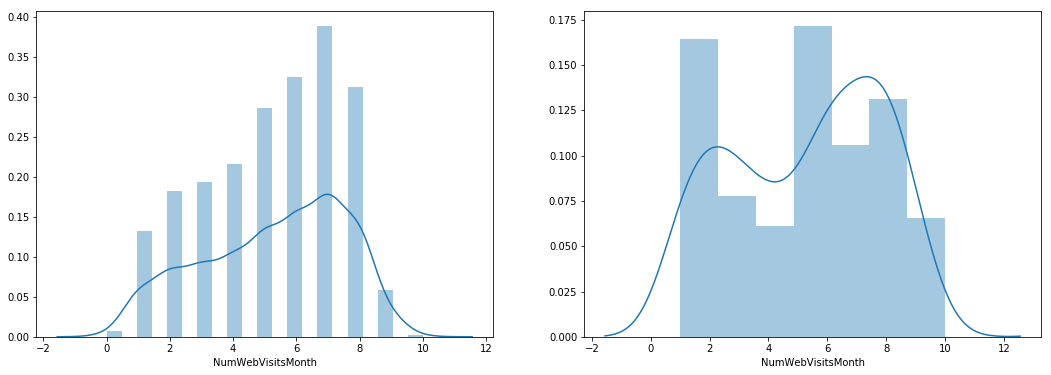

In [47]:
# more evenly spread out for converted, but similar range
f,(ax1,ax2) = plt.subplots(1,2, figsize=(18,6))
sns.distplot(new_df.NumWebVisitsMonth[new_df.Response == 0], ax=ax1)
sns.distplot(new_df.NumWebVisitsMonth[new_df.Response == 1], ax=ax2)

In [37]:
# virtually identical averages reconfirm how almost perfectly uncorrelated this metric is
pd.concat([new_df.NumWebVisitsMonth[new_df.Response == 0].describe(), new_df.NumWebVisitsMonth[new_df.Response == 1].describe()], axis=1)

,NumWebVisitsMonth,NumWebVisitsMonth
count,1872.000000,331.000000
mean,5.271902,5.262840
std,2.228838,2.560855
min,0.000000,1.000000
25%,4.000000,3.000000
50%,6.000000,6.000000
75%,7.000000,8.000000
max,10.000000,10.000000


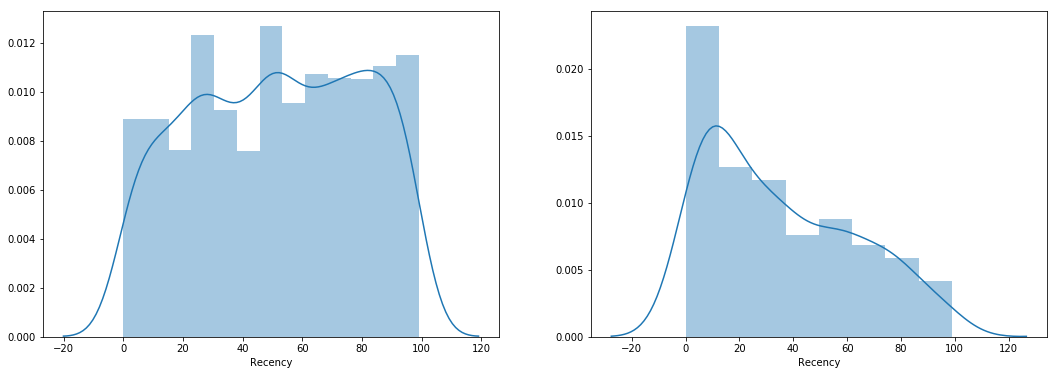

In [48]:
# same here with positive skew for converted
f,(ax1,ax2) = plt.subplots(1,2, figsize=(18,6))
sns.distplot(new_df.Recency[new_df.Response == 0], ax=ax1)
sns.distplot(new_df.Recency[new_df.Response == 1], ax=ax2)

In [38]:
# one of the few features to have a negative correlation
pd.concat([new_df.Recency[new_df.Response == 0].describe(), new_df.Recency[new_df.Response == 1].describe()], axis=1)

,Recency,Recency
count,1872.000000,331.000000
mean,51.559295,35.552870
std,28.466990,27.718707
min,0.000000,0.000000
25%,27.000000,11.000000
50%,52.000000,30.000000
75%,77.000000,56.000000
max,99.000000,99.000000


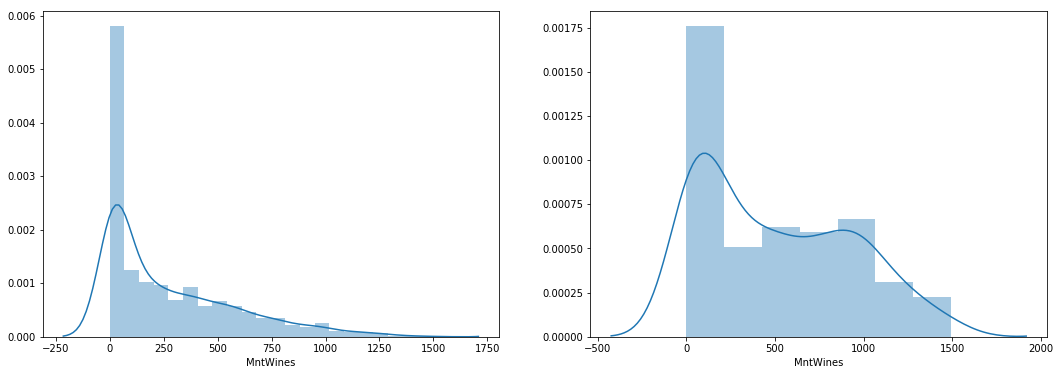

In [49]:
# despite lots of zeroes significantly higher number of wine purchased for converted
f,(ax1,ax2) = plt.subplots(1,2, figsize=(18,6))
sns.distplot(new_df.MntWines[new_df.Response == 0], ax=ax1)
sns.distplot(new_df.MntWines[new_df.Response == 1], ax=ax2)

In [39]:
# very strong indication that those who were converted buy a lot more wine than those who weren't
pd.concat([new_df.MntWines[new_df.Response == 0].describe(), new_df.MntWines[new_df.Response == 1].describe()], axis=1)

,MntWines,MntWines
count,1872.000000,331.000000
mean,273.633013,507.211480
std,306.020969,426.468824
min,0.000000,1.000000
25%,23.000000,100.000000
50%,159.500000,450.000000
75%,448.500000,886.000000
max,1493.000000,1492.000000


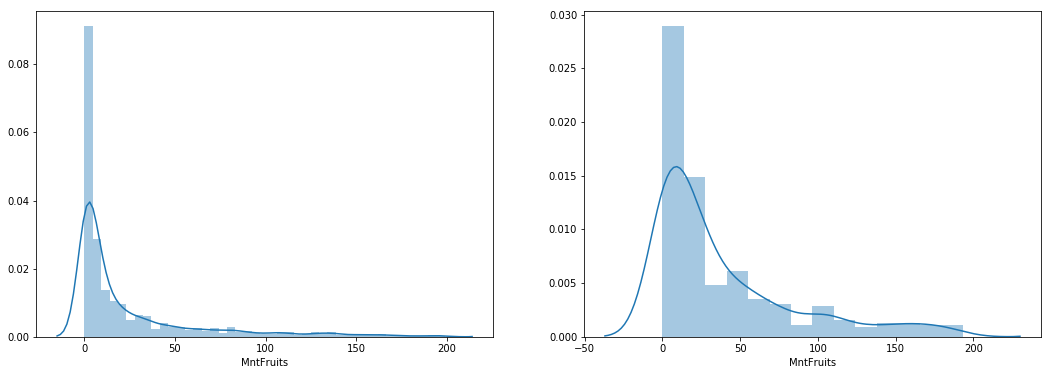

In [50]:
# similar distribution but seemingly a higher number of fruit bought by converted
f,(ax1,ax2) = plt.subplots(1,2, figsize=(18,6))
sns.distplot(new_df.MntFruits[new_df.Response == 0], ax=ax1)
sns.distplot(new_df.MntFruits[new_df.Response == 1], ax=ax2)

In [51]:
# reconfirms positive correlation score. those that were converted spent about 14 more on fruit
pd.concat([new_df.MntFruits[new_df.Response == 0].describe(), new_df.MntFruits[new_df.Response == 1].describe()], axis=1)

,MntFruits,MntFruits
count,1872.000000,331.000000
mean,24.543803,38.444109
std,38.440222,46.232080
min,0.000000,0.000000
25%,1.000000,4.000000
50%,7.000000,21.000000
75%,30.000000,54.000000
max,199.000000,193.000000


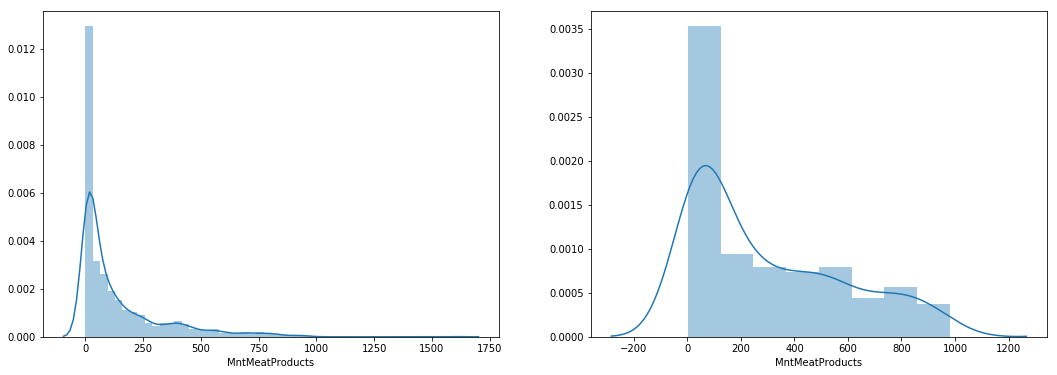

In [53]:
f,(ax1,ax2) = plt.subplots(1,2, figsize=(18,6))
sns.distplot(new_df.MntMeatProducts[new_df.Response == 0], ax=ax1)
sns.distplot(new_df.MntMeatProducts[new_df.Response == 1], ax=ax2)

In [57]:
# double average and three times median, this reconfirms that amount spent on meat is a strong indicator of conversion
pd.concat([new_df.MntMeatProducts[new_df.Response == 0].describe(), new_df.MntMeatProducts[new_df.Response == 1].describe()], axis=1)

,MntMeatProducts,MntMeatProducts
count,1872.000000,331.000000
mean,143.519231,296.894260
std,194.122531,286.937451
min,0.000000,1.000000
25%,14.000000,50.000000
50%,57.000000,184.000000
75%,195.250000,513.000000
max,1607.000000,981.000000


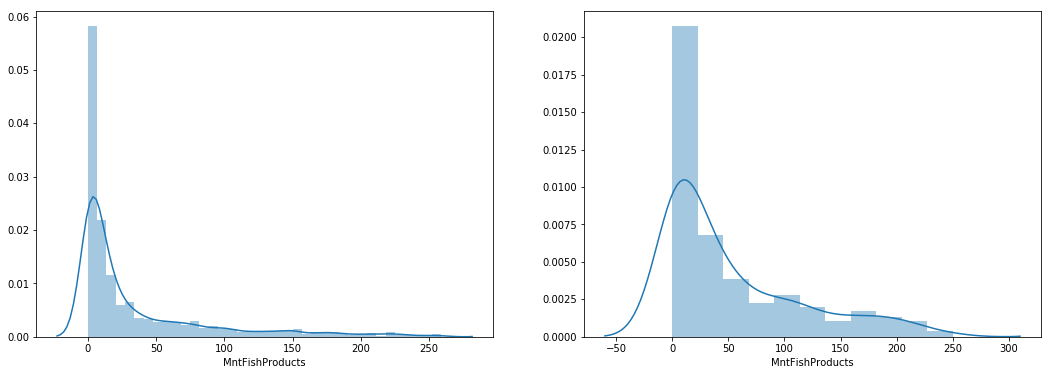

In [54]:
f,(ax1,ax2) = plt.subplots(1,2, figsize=(18,6))
sns.distplot(new_df.MntFishProducts[new_df.Response == 0], ax=ax1)
sns.distplot(new_df.MntFishProducts[new_df.Response == 1], ax=ax2)

In [58]:
# less trong but clear correlation here
pd.concat([new_df.MntFishProducts[new_df.Response == 0].describe(), new_df.MntFishProducts[new_df.Response == 1].describe()], axis=1)

,MntFishProducts,MntFishProducts
count,1872.000000,331.00000
mean,35.533120,52.41994
std,53.184239,62.01282
min,0.000000,0.00000
25%,2.000000,4.00000
50%,11.000000,27.00000
75%,45.000000,85.00000
max,259.000000,250.00000


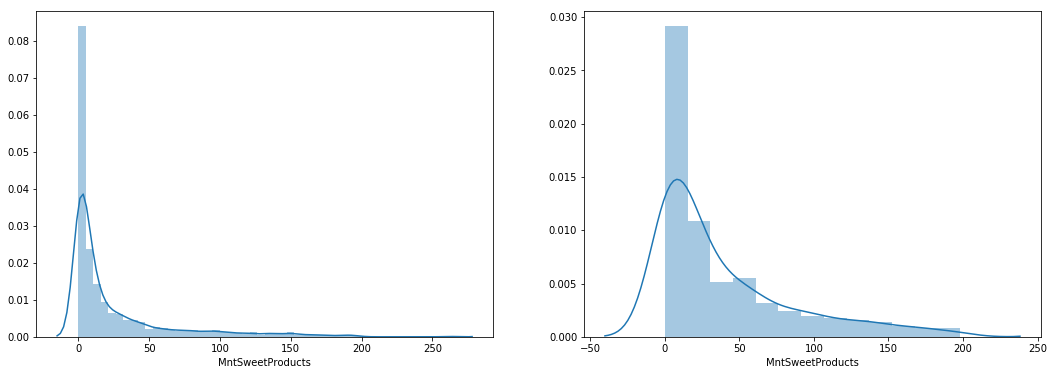

In [55]:
f,(ax1,ax2) = plt.subplots(1,2, figsize=(18,6))
sns.distplot(new_df.MntSweetProducts[new_df.Response == 0], ax=ax1)
sns.distplot(new_df.MntSweetProducts[new_df.Response == 1], ax=ax2)

In [59]:
# definite correlation
pd.concat([new_df.MntSweetProducts[new_df.Response == 0].describe(), new_df.MntSweetProducts[new_df.Response == 1].describe()], axis=1)

,MntSweetProducts,MntSweetProducts
count,1872.000000,331.000000
mean,25.424145,38.848943
std,40.251755,46.479205
min,0.000000,0.000000
25%,1.000000,3.000000
50%,7.500000,20.000000
75%,30.000000,57.500000
max,263.000000,198.000000


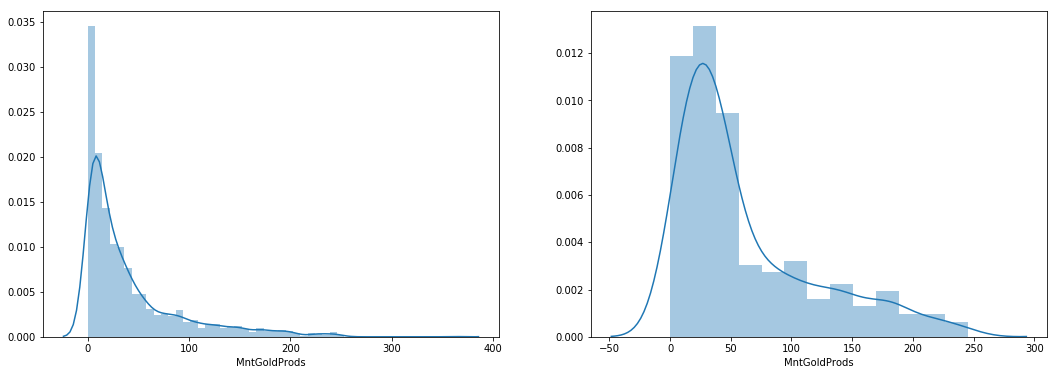

In [56]:
f,(ax1,ax2) = plt.subplots(1,2, figsize=(18,6))
sns.distplot(new_df.MntGoldProds[new_df.Response == 0], ax=ax1)
sns.distplot(new_df.MntGoldProds[new_df.Response == 1], ax=ax2)

In [61]:
# relatively small but clear positive correlation
pd.concat([new_df.MntGoldProds[new_df.Response == 0].describe(), new_df.MntGoldProds[new_df.Response == 1].describe()], axis=1)

,MntGoldProds,MntGoldProds
count,1872.000000,331.000000
mean,41.078526,61.628399
std,49.849916,57.731912
min,0.000000,0.000000
25%,7.750000,20.000000
50%,21.000000,39.000000
75%,53.250000,85.500000
max,362.000000,245.000000


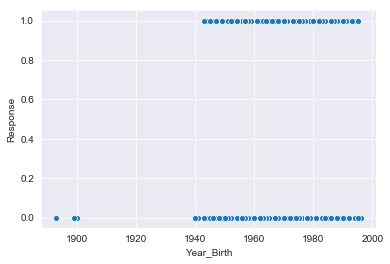

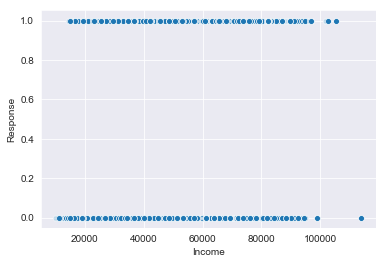

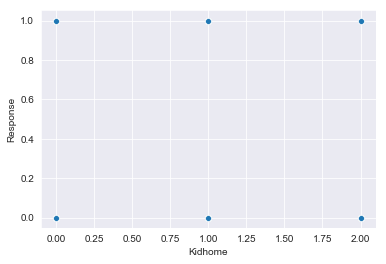

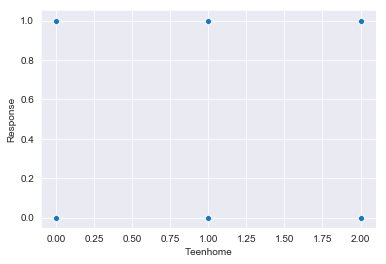

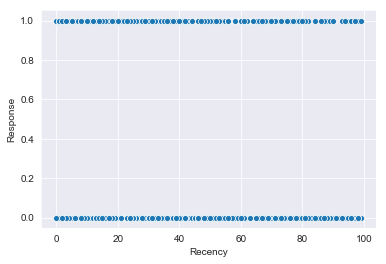

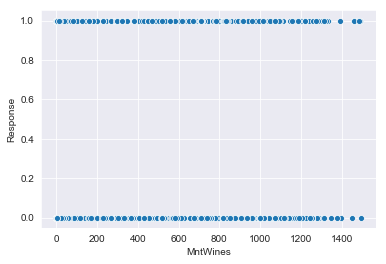

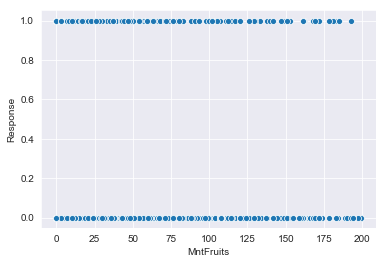

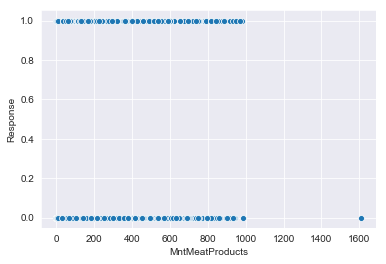

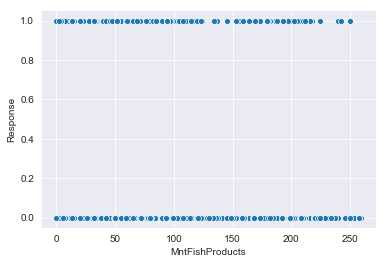

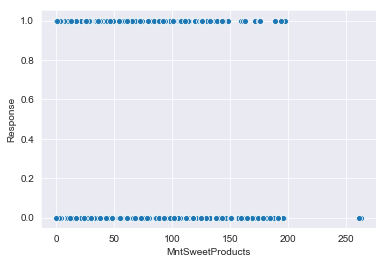

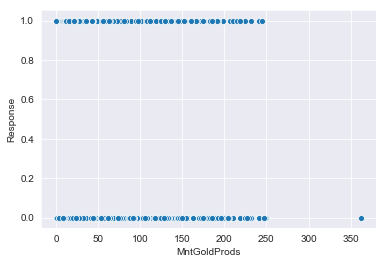

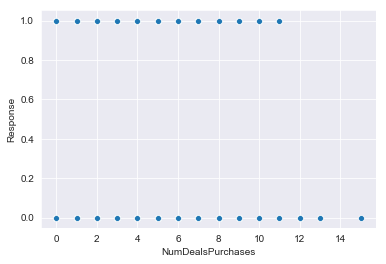

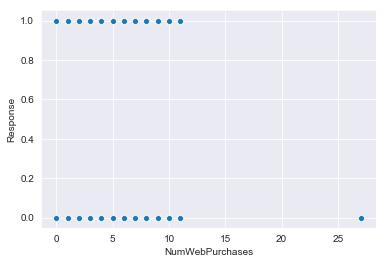

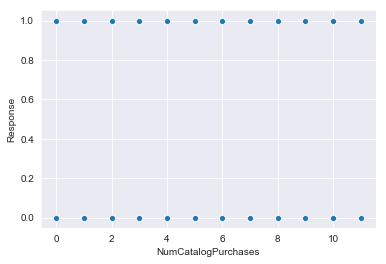

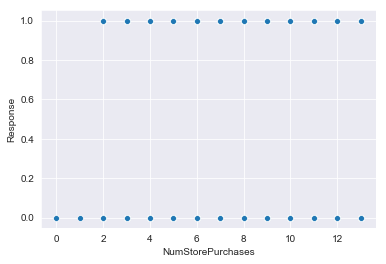

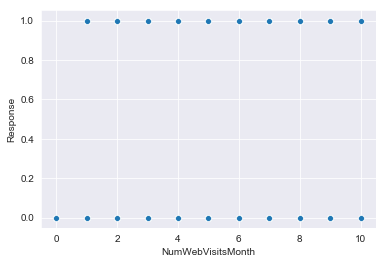

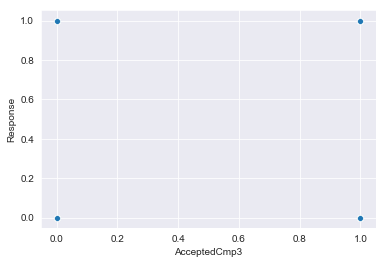

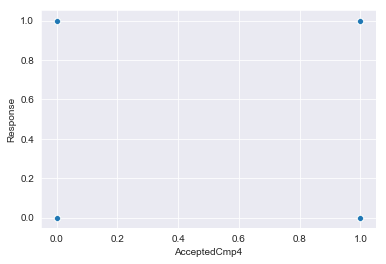

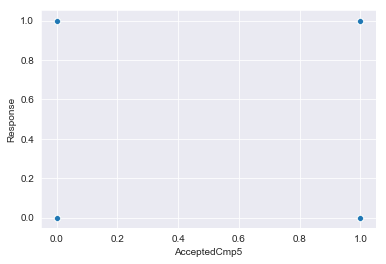

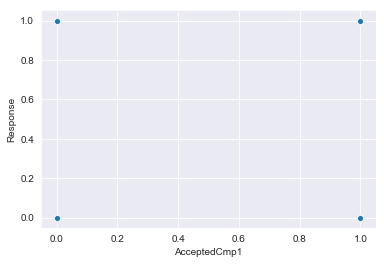

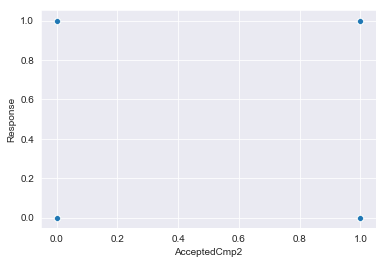

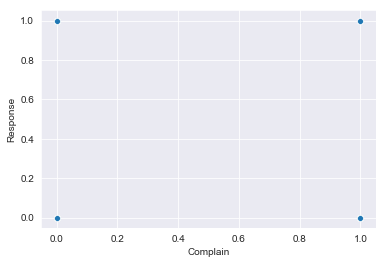

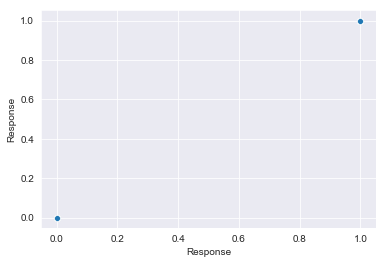

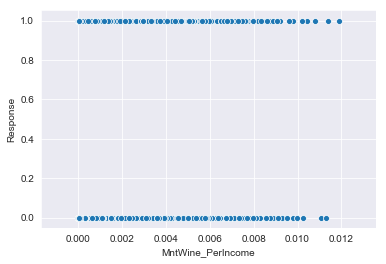

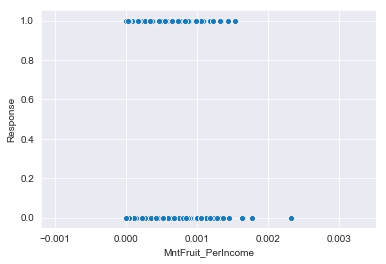

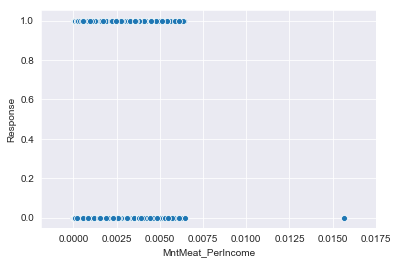

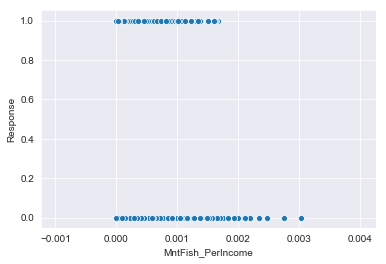

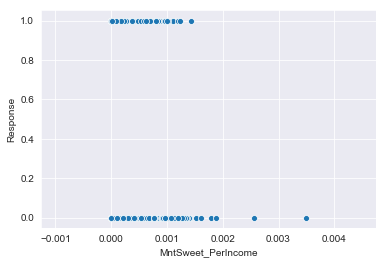

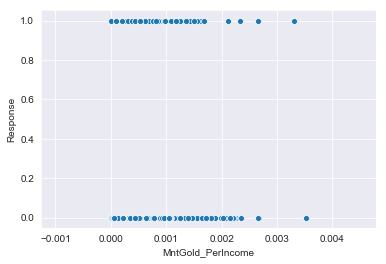

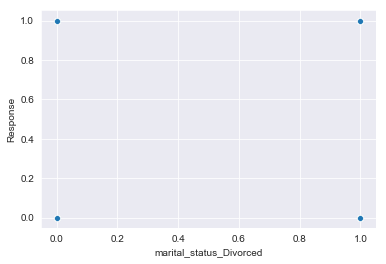

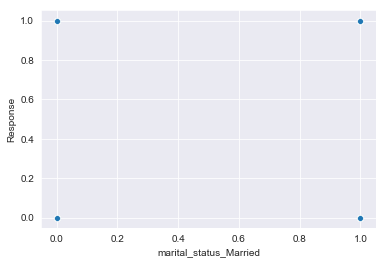

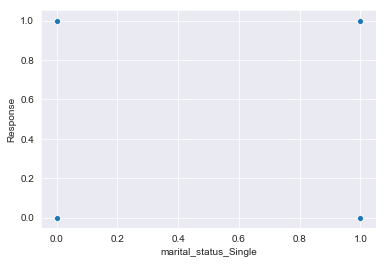

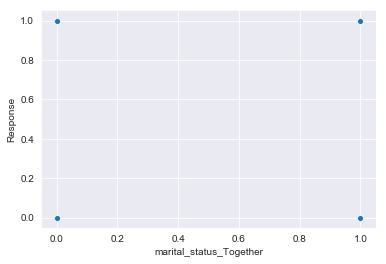

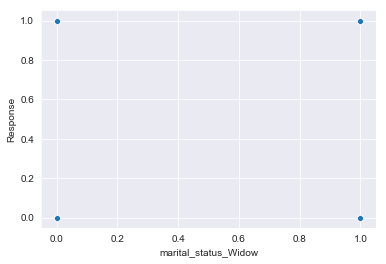

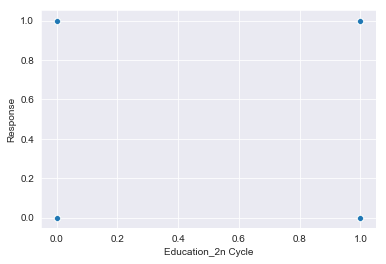

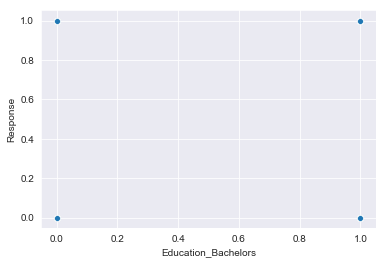

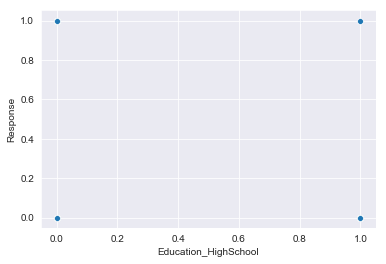

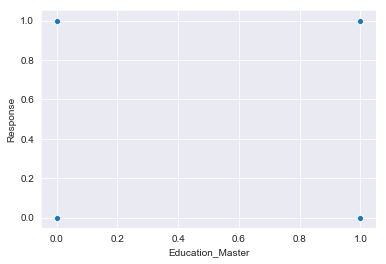

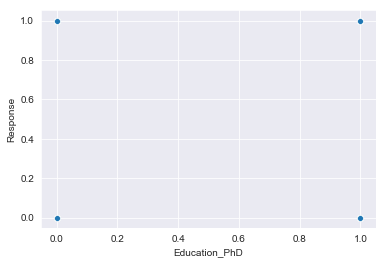

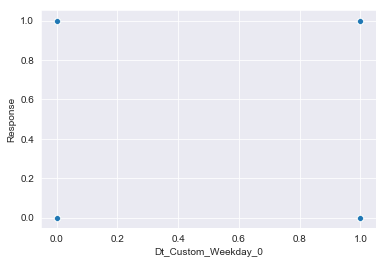

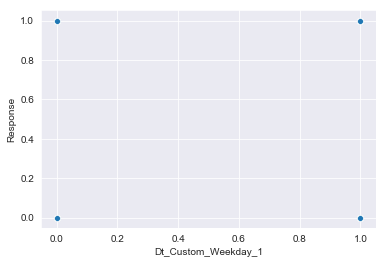

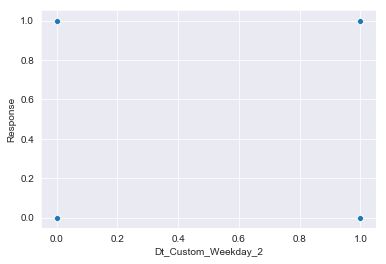

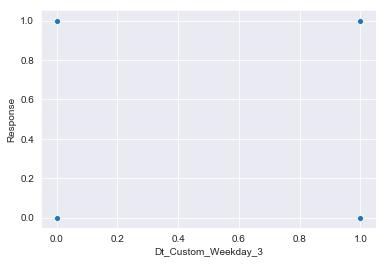

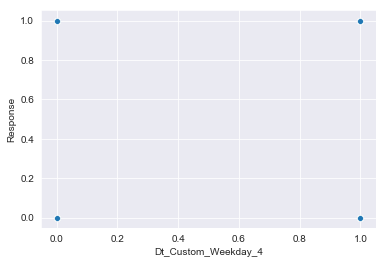

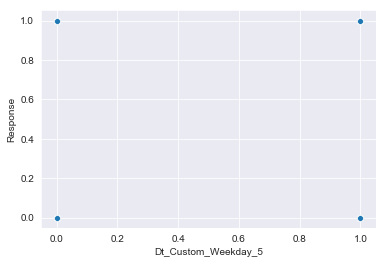

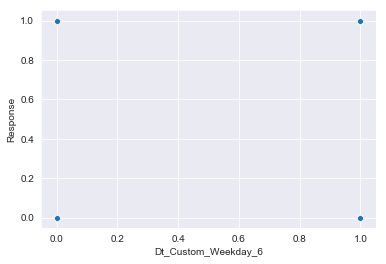

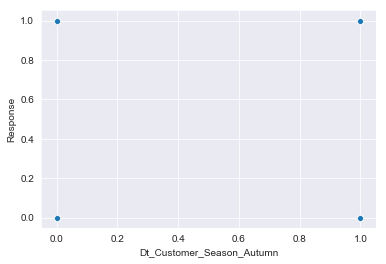

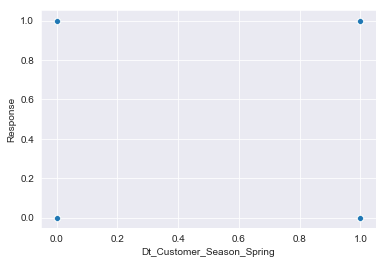

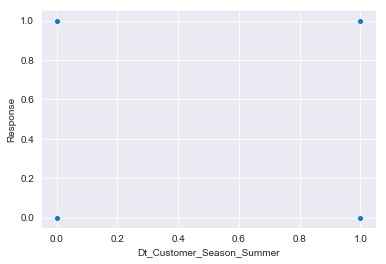

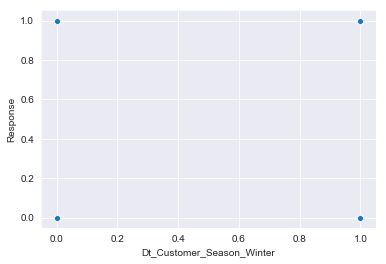

In [123]:
# plotting feature correlations with target
for col in new_df.columns:
    sns.scatterplot(x=col, y=new_df.Response, data=new_df)
    plt.show()

In [62]:
# copying dataframe to log transform one version
# new_df.Recency = df.Recency
transform_df = new_df.copy()

In [63]:
transform_df.Recency.isnull().sum()

0

In [64]:
# log transforming some features
transform_df.MntWines = np.where(transform_df.MntWines!=0, transform_df.MntWines.transform(np.log),0)

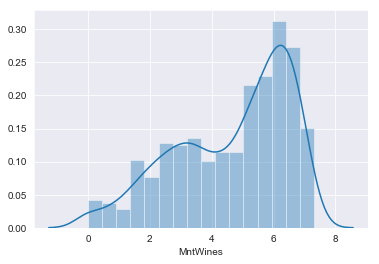

In [166]:
sns.distplot(transform_df.MntWines)

In [65]:
transform_df.MntFruits = np.where(transform_df.MntFruits!=0, transform_df.MntFruits.transform(np.log),0)
transform_df.MntMeatProducts = np.where(transform_df.MntMeatProducts!=0, transform_df.MntMeatProducts.transform(np.log),0)
transform_df.MntFishProducts = np.where(transform_df.MntFishProducts!=0, transform_df.MntFishProducts.transform(np.log),0)
transform_df.MntSweetProducts = np.where(transform_df.MntSweetProducts!=0, transform_df.MntSweetProducts.transform(np.log),0)
transform_df.MntGoldProds = np.where(transform_df.MntGoldProds!=0, transform_df.MntGoldProds.transform(np.log),0)

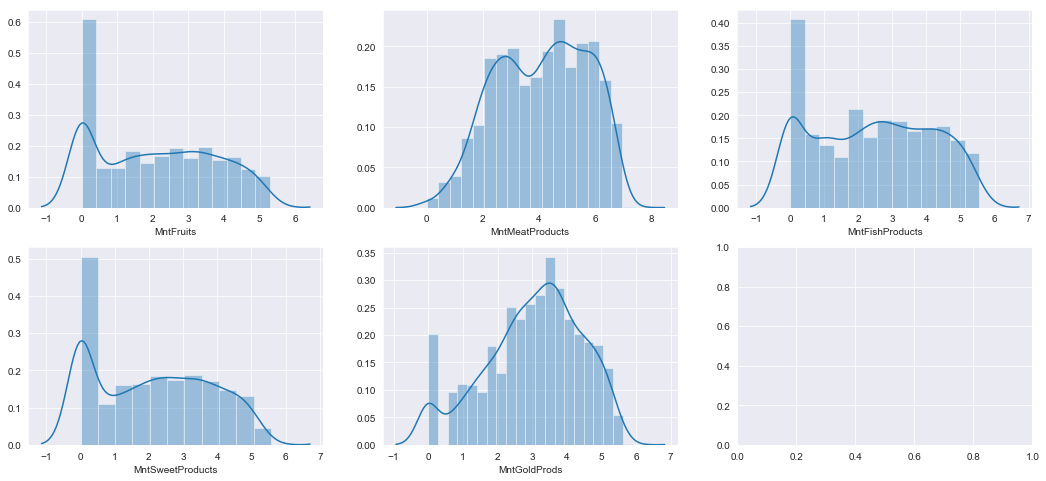

In [168]:
# checking distributions of transformed data
fig, ([ax1,ax2,ax3],[ax4,ax5,ax6]) = plt.subplots(2,3,figsize=(18,8))
sns.distplot(transform_df.MntFruits, ax=ax1)
sns.distplot(transform_df.MntMeatProducts, ax=ax2)
sns.distplot(transform_df.MntFishProducts, ax=ax3)
sns.distplot(transform_df.MntSweetProducts, ax=ax4)
sns.distplot(transform_df.MntGoldProds, ax=ax5)

In [66]:
# doing the same for income proportions
transform_df.MntWine_PerIncome = np.where(transform_df.MntWine_PerIncome!=0, transform_df.MntWine_PerIncome.transform(np.log),0)
transform_df.MntFruit_PerIncome = np.where(transform_df.MntFruit_PerIncome!=0, transform_df.MntFruit_PerIncome.transform(np.log),0)
transform_df.MntMeat_PerIncome = np.where(transform_df.MntMeat_PerIncome!=0, transform_df.MntMeat_PerIncome.transform(np.log),0)
transform_df.MntFish_PerIncome = np.where(transform_df.MntFish_PerIncome!=0, transform_df.MntFish_PerIncome.transform(np.log),0)
transform_df.MntSweet_PerIncome = np.where(transform_df.MntSweet_PerIncome!=0, transform_df.MntSweet_PerIncome.transform(np.log),0)
transform_df.MntGold_PerIncome = np.where(transform_df.MntGold_PerIncome!=0, transform_df.MntGold_PerIncome.transform(np.log),0)

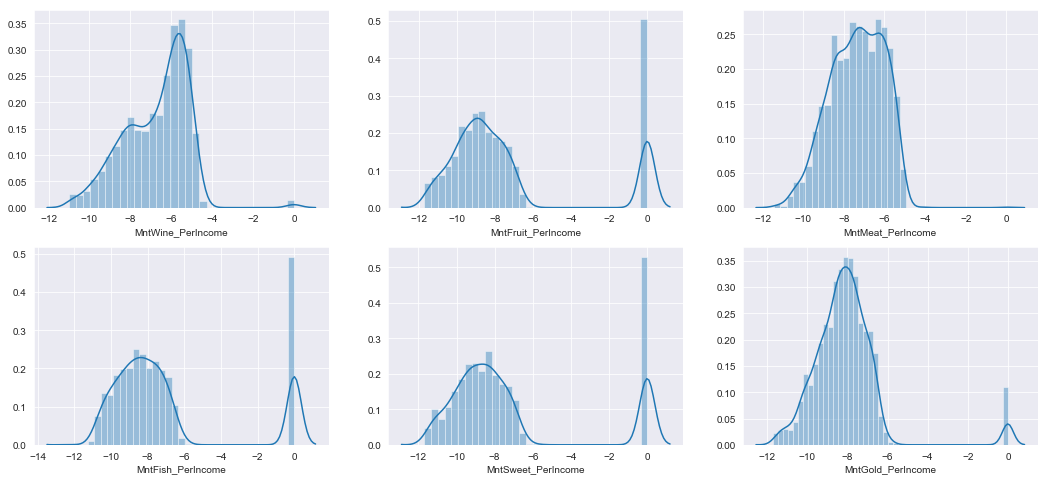

In [170]:
# lots of zero values below, which will be problematic in the model building phase
fig, ([ax1,ax2,ax3],[ax4,ax5,ax6]) = plt.subplots(2,3,figsize=(18,8))
sns.distplot(transform_df.MntWine_PerIncome, ax=ax1)
sns.distplot(transform_df.MntFruit_PerIncome, ax=ax2)
sns.distplot(transform_df.MntMeat_PerIncome, ax=ax3)
sns.distplot(transform_df.MntFish_PerIncome, ax=ax4)
sns.distplot(transform_df.MntSweet_PerIncome, ax=ax5)
sns.distplot(transform_df.MntGold_PerIncome, ax=ax6)

In [67]:
# checking number of records that have three 0 amounts where there are the most 0s
len(transform_df[(transform_df.MntFruit_PerIncome == 0) & (transform_df.MntFish_PerIncome == 0) & (transform_df.MntSweet_PerIncome == 0)])

157

In [68]:
# removing these values and double checking the difference
transform_df1 = transform_df.drop(transform_df[(transform_df.MntFruit_PerIncome == 0) & 
                                               (transform_df.MntFish_PerIncome == 0) & 
                                               (transform_df.MntSweet_PerIncome == 0)].index)

In [69]:
len(transform_df) - len(transform_df1)

157

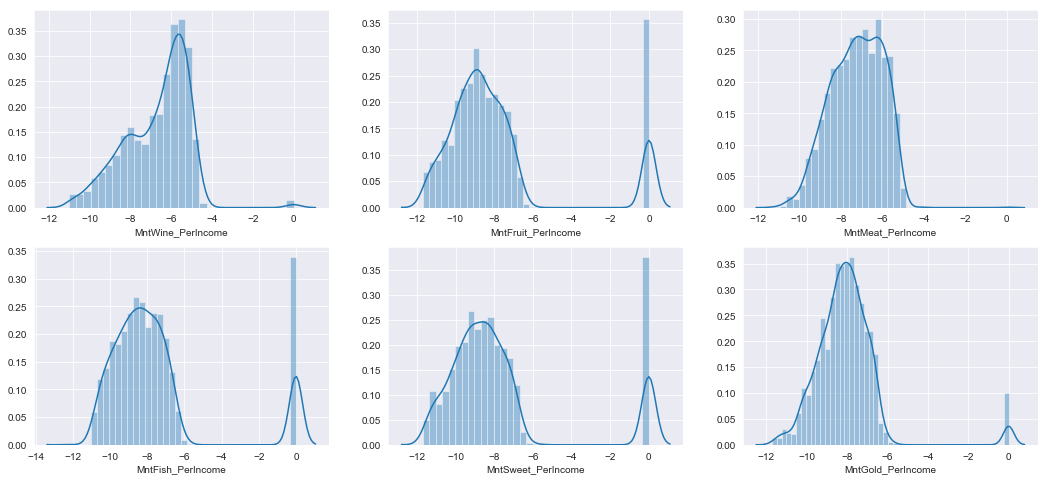

In [178]:
# checking new distributions. took care of about 15% of zero values, but a lot still there
fig, ([ax1,ax2,ax3],[ax4,ax5,ax6]) = plt.subplots(2,3,figsize=(18,8))
sns.distplot(transform_df1.MntWine_PerIncome, ax=ax1)
sns.distplot(transform_df1.MntFruit_PerIncome, ax=ax2)
sns.distplot(transform_df1.MntMeat_PerIncome, ax=ax3)
sns.distplot(transform_df1.MntFish_PerIncome, ax=ax4)
sns.distplot(transform_df1.MntSweet_PerIncome, ax=ax5)
sns.distplot(transform_df1.MntGold_PerIncome, ax=ax6)

In [179]:
len(transform_df.columns)

50

In [180]:
# exporting different versions of the datasets to give myself options. ultimately only used the last one
df.to_csv('df_no_dummies.csv')
new_df.to_csv('df_no_transform.csv')
transform_df.to_csv('df_trasnform_zeroes_included.csv')
transform_df1.to_csv('df_transform_zeroes_excluded.csv')